In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\MilaClimateChangeHackathon2019\data\Final_Dataset.csv", index_col=0)

In [3]:
possible_targets = ['Number of Incidents', 'Implied vehicules', 'Serious injury',
       'Light injury', 'Total victims', 'Trucks and car', 'Heavy tractor',
       'Tool equipment', 'Bus', 'Bicycle', 'Moped', 'Motorcycle',
       'Emergency vehicule', 'Snowmobile', 'VHR', 'Other types',
       'Non-Precise vehicule', 'Pedestrian death', 'Pedestrian injury',
       'Pedestrian victims', 'Motorcycle death', 'Motorcycle injuries',
       'Motorcycle victims', 'Bicycle death', 'Bicycle injury',
       'Bicycle victims', 'Severity: Inferior damages',
       'Severity: Material damages', 'Severity: Serious injury',
       'Severity: Light injury', 'Severity: Death']

In [4]:
target = 'Number of Incidents'
targets = [*possible_targets]
targets.remove(target)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(possible_targets, axis=1), df[target], test_size=0.33)

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
mean_absolute_error(y_test, y_pred)

2.185040988401394

In [11]:
for i in range(20):
    print(y_test.iloc[i], '\t', y_pred[i])

5.0 	 11.2449951171875
13.0 	 16.819580078125
17.0 	 17.0416259765625
0.0 	 0.3411865234375
3.0 	 3.115478515625
7.0 	 14.037109375
3.0 	 4.90966796875
0.0 	 0.43212890625
2.0 	 0.8575439453125
0.0 	 -0.5045166015625
0.0 	 -0.004150390625
7.0 	 4.946533203125
22.0 	 16.39794921875
5.0 	 3.7998046875
21.0 	 16.9688720703125
13.0 	 13.37060546875
13.0 	 14.8182373046875
3.0 	 1.7607421875
0.0 	 3.22021484375
2.0 	 1.7816162109375


In [12]:
res = dict()
for i in range(len(model.coef_)):
    res[X_train.columns[i]] = model.coef_[i]

In [13]:
res

{'pr_CNRM-CM5_historical_rcp26_(kg m-2 d-1)': 0.0060112828156903535,
 'pr_CNRM-CM5_historical_rcp45_(kg m-2 d-1)': 0.0013923260543490415,
 'pr_CNRM-CM5_historical_rcp85_(kg m-2 d-1)': 0.01449007905479742,
 'pr_MIROC-ESM-CHEM_historical_rcp26_(kg m-2 d-1)': -0.0035890107679817187,
 'pr_MIROC-ESM-CHEM_historical_rcp45_(kg m-2 d-1)': -0.007945377658263721,
 'pr_MIROC-ESM-CHEM_historical_rcp85_(kg m-2 d-1)': 0.017445889647952382,
 'pr_MIROC-ESM_historical_rcp26_(kg m-2 d-1)': -0.005365861121054361,
 'pr_MIROC-ESM_historical_rcp45_(kg m-2 d-1)': -0.00040633554650587264,
 'pr_MIROC-ESM_historical_rcp85_(kg m-2 d-1)': -0.001254820940774577,
 'pr_MRI-CGCM3_historical_rcp26_(kg m-2 d-1)': -0.003863792273869997,
 'pr_MRI-CGCM3_historical_rcp45_(kg m-2 d-1)': 0.007224814439930484,
 'pr_MRI-CGCM3_historical_rcp85_(kg m-2 d-1)': 0.00721915473056905,
 'GRID_45.458333155|-73.625002695': 556749688317.6538,
 'GRID_45.458333155|-73.70833602500002': 556749688307.485,
 'GRID_45.458333155|-73.791669355': 5

In [16]:
import matplotlib.pyplot as plt

In [37]:
gds = [x for x in X_train.columns if 'GRID_' in x]

GRID_45.458333155|-73.625002695
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.458333155|-73.70833602500002
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.458333155|-73.791669355
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.458333155|-73.875002685
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.458333155|-73.958336015
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.541666485|-73.541669365
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.541666485|-73.625002695
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.541666485|-73.70833602500002
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.541666485|-73.791669355
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.541666485|-73.875002685
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.624999815|-73.541669365
4768.734968095809 4776.6427233339755
0.1658250100094041
GRID_45.624999815|-73.

[{'Grid': 'GRID_45.458333155|-73.625002695',
  'Start': 4768.734968095809,
  'End': 4776.6427233339755,
  'Percent Change': 0.1658250100094041},
 {'Grid': 'GRID_45.458333155|-73.70833602500002',
  'Start': 4768.734968095809,
  'End': 4776.6427233339755,
  'Percent Change': 0.1658250100094041},
 {'Grid': 'GRID_45.458333155|-73.791669355',
  'Start': 4768.734968095809,
  'End': 4776.6427233339755,
  'Percent Change': 0.1658250100094041},
 {'Grid': 'GRID_45.458333155|-73.875002685',
  'Start': 4768.734968095809,
  'End': 4776.6427233339755,
  'Percent Change': 0.1658250100094041},
 {'Grid': 'GRID_45.458333155|-73.958336015',
  'Start': 4768.734968095809,
  'End': 4776.6427233339755,
  'Percent Change': 0.1658250100094041},
 {'Grid': 'GRID_45.541666485|-73.541669365',
  'Start': 4768.734968095809,
  'End': 4776.6427233339755,
  'Percent Change': 0.1658250100094041},
 {'Grid': 'GRID_45.541666485|-73.625002695',
  'Start': 4768.734968095809,
  'End': 4776.6427233339755,
  'Percent Change': 0

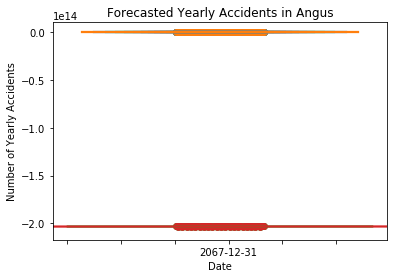

In [50]:
data = []
for GRID in gds:

    future_data = pd.read_csv(r"C:\Users\olive\Documents\GitHub\MilaClimateChangeHackathon2019\data\Future_Dataset_WithDates.csv", index_col=0, parse_dates=True)

    future_data['Forecast'] = 0.0
    future_data.loc[future_data[GRID]==1, 'Forecast'] = model.predict(future_data[future_data[GRID]==1].drop(['Forecast'], axis=1))

    future_data = future_data.resample(rule='A').sum()

    future_data = future_data.reset_index().sort_values('time')
    future_data['date_f'] = pd.factorize(future_data['time'])[0] + 1
    mapping = dict(zip(future_data['date_f'], future_data['time'].dt.date))

    ax = sns.regplot('date_f', 'Forecast', data=future_data)
    labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
    ax.set_xticklabels(labels)
    ax.set_ylabel('Number of Yearly Accidents')
    ax.set_xlabel('Date')
    ax.set_title('Forecasted Yearly Accidents in Angus')

    start = ax.get_lines()[0].get_ydata()[0]
    end = ax.get_lines()[0].get_ydata()[-1]
    
    data.append({'Grid': GRID, 'Start': start, 
                 'End': end, 'Percent Change': 100*(end-start)/start})
    print(GRID)
    print(start, end)
    print(100*(end-start)/start)
    print('\n')
data

In [51]:
pd.DataFrame(data)

,End,Grid,Percent Change,Start
0,4776.642723,GRID_45.458333155|-73.625002695,0.165825,4768.734968
1,4776.642723,GRID_45.458333155|-73.70833602500002,0.165825,4768.734968
2,4776.642723,GRID_45.458333155|-73.791669355,0.165825,4768.734968
3,4776.642723,GRID_45.458333155|-73.875002685,0.165825,4768.734968
4,4776.642723,GRID_45.458333155|-73.958336015,0.165825,4768.734968
5,4776.642723,GRID_45.541666485|-73.541669365,0.165825,4768.734968
6,4776.642723,GRID_45.541666485|-73.625002695,0.165825,4768.734968
7,4776.642723,GRID_45.541666485|-73.70833602500002,0.165825,4768.734968
8,4776.642723,GRID_45.541666485|-73.791669355,0.165825,4768.734968
9,4776.642723,GRID_45.541666485|-73.875002685,0.165825,4768.734968
